In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



file = "ride_data.csv"
file2 = "city_data.csv"

city_df = pd.read_csv(file2)
ride_df = pd.read_csv(file)

df = ride_df.merge(city_df, on = 'city', how = 'outer')
df[]

In [2]:
df2 = df[['city','driver_count','type']]
df2 = df2.drop_duplicates()
df2 = df2.set_index('city')
type_array = df2['type'].unique()

In [3]:
df2 = df[['city','driver_count','type']]
df2 = df2.drop_duplicates()
df2 = df2.set_index('city')

type_array = df2['type'].unique()

city_gp = df.groupby('city')

#these are of type series
city_fare_avg = city_gp['fare'].mean()
city_fare_tot = city_gp['fare'].sum()
ride_ct = city_gp['ride_id'].count()




df_work = pd.DataFrame(columns = ['Ride Count', 'Average Fare', 'Total Fares'])
df_work['Ride Count'] = ride_ct
df_work['Average Fare'] = city_fare_avg
df_work['Total Fares'] = city_fare_tot
df_work.head()

df3 = df_work.merge(df2, on = 'city')
tot_rides = df3['Ride Count'].sum()
tot_fares = df3['Total Fares'].sum()
tot_drivers = df3['driver_count'].sum()

df3['% of total fares'] = (df3['Total Fares'] / tot_fares) * 100
df3['% of total rides'] = (df3['Ride Count'] / tot_rides) * 100
df3['% of total drivers'] = (df3['driver_count'] / tot_drivers) * 100


gp2 = df3.groupby('type')
df4 = gp2.sum()

## Bubble Plot of Ride Sharing Data

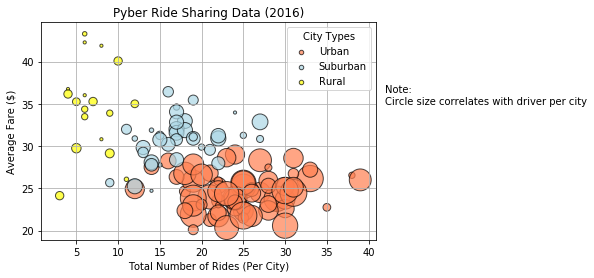

In [4]:
color = ['coral','lightblue','yellow']

for x, color in zip(type_array, color):
    plt.scatter(df3.loc[df3['type'] == x]['Ride Count'], df3.loc[df3['type'] == x]['Average Fare'], alpha = .7,
                marker = 'o',edgecolors="black", label = x, s = df3.loc[df3['type'] == x]['driver_count']*10, c=color)



lgnd = plt.legend(title = 'City Types')
for handle in lgnd.legendHandles:
    handle.set_sizes([20])

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.grid()

plt.title('Pyber Ride Sharing Data (2016)')
plt.text(42,35,s='Note:\nCircle size correlates with driver per city')
plt.savefig("Pyber_Ride_Sharing_Data.png")
plt.show()

## Total Fares by City Type

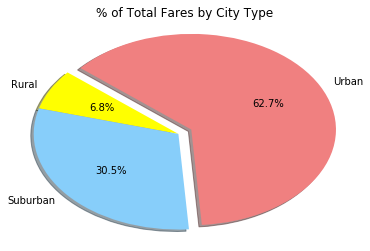

In [5]:
colors = ['yellow', 'lightskyblue', 'lightcoral']

plt.pie(df4['% of total fares'], explode = [0,0,.1], colors = colors, labels= df4.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('auto')
plt.title('% of Total Fares by City Type')
plt.savefig("Total_Fares_by_City_Type.png")

plt.show()

## Total Rides by City Type

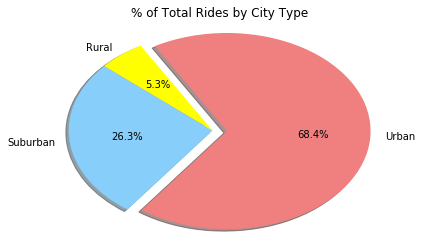

In [6]:
colors = ['yellow', 'lightskyblue', 'lightcoral']

plt.pie(df4['% of total rides'], explode = [0,0,.1], colors = colors, labels= df4.index,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis('auto')
plt.title('% of Total Rides by City Type')
plt.savefig("Total_Rides_by_City_Type.png")

plt.show()

## Total Drivers by City Type

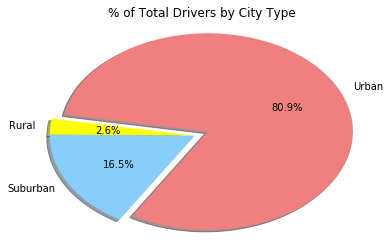

In [7]:
colors = ['yellow', 'lightskyblue', 'lightcoral']

plt.pie(df4['% of total drivers'], explode = [0,0,.1], colors = colors, labels= df4.index,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.axis('auto')
plt.title('% of Total Drivers by City Type')
plt.savefig("Total_Drivers_by_City_Type.png")

plt.show()